## 1) Loading libraries 

In [2]:
# a powerful data analysis and manipulation library for Python
import pandas as pd 
# Fast mathematical operations over arrays
import numpy as np  
# pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:: 
import matplotlib.pyplot as plt  
# the output of plotting commands is displayed inline within frontends.
%matplotlib inline
#Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
# For clustering using KMeans algorithm
from sklearn.cluster import KMeans
#For splitting dataset for training a model
from sklearn.model_selection import train_test_split 
# For scaling the data
from sklearn.preprocessing import StandardScaler 
# For applying KNN classification algorithm
from sklearn.neighbors import KNeighborsClassifier 

## 2) Load data

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3) Overview of data

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 4) drop id and species column since we need only fatures of iris dataset

In [8]:
df = data.drop(['Id','Species'],axis=1)

### 5) show data

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 6) Scaling data using MinMaxScaler 

In [10]:
mms=MinMaxScaler()
mms.fit(df)
data_transformed=mms.transform(df)

## 7) View transformed and scaled data

In [11]:
data_transformed = pd.DataFrame(data_transformed,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
data_transformed

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


  ## 8) Elbow method to minimize within cluster sum of squares 

In [12]:
sum_of_squared_distance = []
K = range(1,15)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distance.append(km.inertia_)   

## 9) Plotting elbow curve by K (no of clusters)

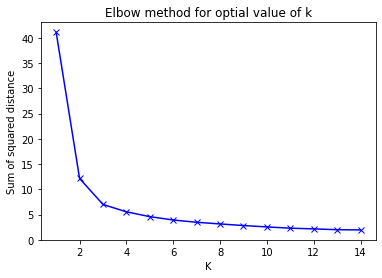

In [13]:
plt.plot(K,sum_of_squared_distance,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for optial value of k')
plt.show()

###  In the plot show above the Elbow is at k=3 indicate that optimum k for this dataset is 3

## 10) Train model on final data

In [21]:
idata = data.drop(['Id'],axis=1)

### Step 1:- Defining data and label

In [22]:
X = idata.iloc[:, 1:4]
y = idata.iloc[:, 4]

### Step 2:- Splitting the data

In [23]:
#Split data into training and test datasets (training will be based on 70% of data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


### Step 3:- Scaling the data

In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std and X_test_std are the scaled datasets to be used in algorithms

### Step 4:- Applying algorithm

### K Nearest Neighbors(KNN)

*   K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).
*  A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))

The accuracy of the Knn classifier on training data is 0.95
The accuracy of the Knn classifier on test data is 0.98


## Prediction 

Now we will make a prediction model using K nearest neighbors and try to predict what is the species on the basis of user defined values of labels

In [26]:
knn.predict([[3.7,4.1,2.9]])

array(['Iris-virginica'], dtype=object)